In [32]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [33]:
var_dict = dict(
    numerical_vars = ['Alcohol','Malic_acid','Ash','Alcalinity_of_ash',
                      'Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols',
                      'Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines',
                      'Proline'],
    class_var = 'class'
)

In [34]:
exp = Experiment('data/wine.csv', 
                 var_dict,
                 embedding_dim=32,
                 lr=0.00001,
                 batch_size=1024,
                 n_epoch=30000,
                 verbose=False,
                 n_bins_range=range(2, 3),
                 n_init_bins_list=[10])

In [35]:
%time clustering_scores = exp.test_clustering_performance()

CPU times: user 3h 48min 47s, sys: 40min 17s, total: 4h 29min 4s
Wall time: 4h 28min 52s


In [36]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 13, NMI = 0.4288
agglomerative, #Cols = 13, NMI = 0.4161


In [37]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 13, NMI = 0.8759
agglomerative, #Cols = 13, NMI = 0.7865


In [38]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.5555
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.5865


In [39]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.7021
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.6716


In [40]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 71, NMI = 0.6290
agglomerative
#Init Bins = 10, #Cols = 71, NMI = 0.7040


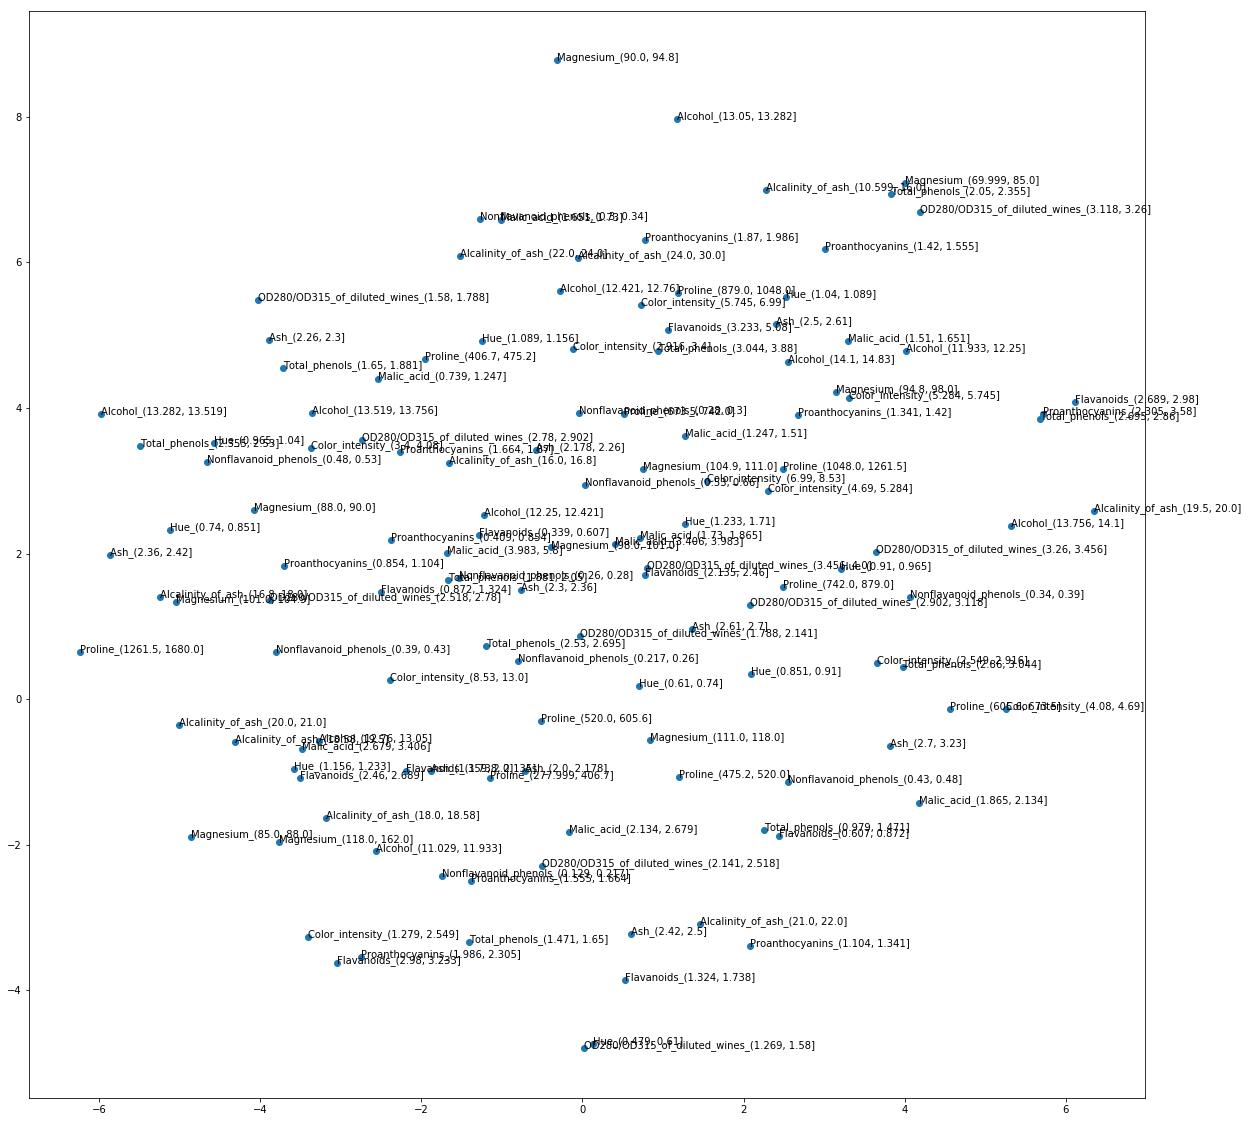

In [41]:
exp.semantic_binning.visualize_bin_embeddings()

In [42]:
%time clf_scores = exp.test_classification_performance(cv=3)

CPU times: user 4h 44min 13s, sys: 16min 46s, total: 5h 59s
Wall time: 4h 59min 31s


In [43]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.949 (+/- 0.083)


In [44]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.989 (+/- 0.016)


In [45]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.848 (+/- 0.025)
LR performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.915 (+/- 0.074)
NB performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.916 (+/- 0.029)


In [46]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.888 (+/- 0.041)
LR performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.950 (+/- 0.047)
NB performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.938 (+/- 0.032)


In [47]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 62.0, Accuracy = 0.854 (+/- 0.088)
LR performance
#Init Bins = 10, #Avg Cols = 62.0, Accuracy = 0.944 (+/- 0.043)
NB performance
#Init Bins = 10, #Avg Cols = 62.0, Accuracy = 0.944 (+/- 0.043)


In [48]:
exp.semantic_binning.bins_by_var

{'Alcalinity_of_ash': {'bins': ['(13.199, 19.0]',
   '(19.0, 20.0]',
   '(20.0, 30.0]'],
  'split_point': [13.199, 19.0, 20.0, 30.0]},
 'Alcohol': {'bins': ['(11.029, 12.078]',
   '(12.078, 12.314]',
   '(12.314, 12.486]',
   '(12.486, 12.77]',
   '(12.77, 13.05]',
   '(13.05, 13.356]',
   '(13.356, 13.544]',
   '(13.544, 14.39]'],
  'split_point': [11.029,
   12.078,
   12.314,
   12.486,
   12.77,
   13.05,
   13.356,
   13.544,
   14.39]},
 'Ash': {'bins': ['(1.699, 1.98]',
   '(1.98, 2.3]',
   '(2.3, 2.36]',
   '(2.36, 2.438]',
   '(2.438, 2.61]',
   '(2.61, 2.7]',
   '(2.7, 3.22]'],
  'split_point': [1.699, 1.98, 2.3, 2.36, 2.438, 2.61, 2.7, 3.22]},
 'Color_intensity': {'bins': ['(1.279, 2.556]',
   '(2.556, 2.946]',
   '(2.946, 13.0]'],
  'split_point': [1.279, 2.556, 2.946, 13.0]},
 'Flavanoids': {'bins': ['(0.339, 2.21]', '(2.21, 2.516]', '(2.516, 3.93]'],
  'split_point': [0.339, 2.21, 2.516, 3.93]},
 'Hue': {'bins': ['(0.539, 0.754]',
   '(0.754, 0.864]',
   '(0.864, 0.912]',